# Searching, Sorting, and Timing

## Agenda

1. Timing
2. Prelude: Timing list indexing
3. Linear search
4. Binary search
5. Insertion sort

## 1. Timing

In [3]:
import time #Lowest level way of telling program efficiency

In [4]:
dir(time)

['_STRUCT_TM_ITEMS',
 '__doc__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'altzone',
 'asctime',
 'clock',
 'ctime',
 'daylight',
 'get_clock_info',
 'gmtime',
 'localtime',
 'mktime',
 'monotonic',
 'perf_counter',
 'process_time',
 'sleep',
 'strftime',
 'strptime',
 'struct_time',
 'time',
 'timezone',
 'tzname']

In [5]:
time.time()#Time since beginning of Epoch, Jan 1 1970 (Unix first day)

1485547563.6618056

In [7]:
time.time() / (365*24*60*60)

47.1064052928495

In [8]:
from time import time

In [9]:
time()

1485547616.9096718

In [10]:
from time import time, sleep
sleep(1)#Waits the allotted amount of time

In [12]:
start = time()
sleep(1)
end = time()
print(end-start)

1.000014066696167


In [13]:
def timeit(f):
    start = time()
    f()
    end = time()
    return end - start

In [14]:
timeit(lambda : sleep(1))

1.0001261234283447

In [33]:
timeit(lambda : sum(range(10**6)))

0.009368014335632325

In [19]:
def timeit(f, iters = 10):
    duration = 0
    for _ in range(iters):
        start = time()
        f()
        end = time()
        duration += end - start
        return duration / iters

In [34]:
import timeit
timeit.timeit('sum(range(10**6))', number = 10) / 10

0.06207050990169222

In [37]:
timeit.timeit(stmt='sorted(lst)',setup='import random ; lst = [random.random() for _ in range(100)]', number=100)

0.002795931087518966

In [41]:
import random
def to_time(lst):
    pass

timeit.timeit(stmt='to_time(lst)',setup='import random ; lst = [random.random() for _ in range(100)]', globals = globals(), number=100)

2.799196818159544e-05

## 2. Prelude: Timing list indexing

In [57]:
import timeit
timeit.timeit(stmt='lst[0]',
              setup='import random; lst=[0] * 10**6')

0.0699174050325837

In [58]:
timeit.timeit(stmt='lst[10**6-1]',
              setup='import random; lst=[0] * 10**6')

0.07176487493188688

In [59]:
import random
size = 10**3
times = [0] * size
lst   = [0] * size
for _ in range(100):
    for i in range(size):
        times[i] += timeit.timeit(stmt='lst[{}]'.format(i),
                                  globals=globals(),
                                  number=10)

In [60]:
times

[0.00011290093914340105,
 0.00010310374921118637,
 0.00010403681494608463,
 0.00010077108458972361,
 9.937148729477485e-05,
 9.79718885218972e-05,
 0.00010170415112042974,
 9.750535650709935e-05,
 0.00010030455257492576,
 0.00010077108458972361,
 0.0001040368157418925,
 0.00010170415055199555,
 9.98380202190674e-05,
 0.00010030455223386525,
 9.890495334730076e-05,
 0.0001021706843857828,
 0.00010217068358997494,
 9.890495380204811e-05,
 0.0001040368157418925,
 0.00010310374887012586,
 0.00010077108549921832,
 0.00010450334809775086,
 0.00010263721628689382,
 0.00010077108572659199,
 9.937148672634066e-05,
 0.0001017041510067429,
 0.00010636947956754739,
 0.00010077108538553148,
 9.983801896851219e-05,
 0.00010077108549921832,
 9.937148706740118e-05,
 9.79718885218972e-05,
 0.00010543641371896229,
 0.00010077108549921832,
 9.937148740846169e-05,
 0.00010403681517345831,
 0.00010030455302967312,
 0.00010496988079466973,
 0.00010543641303684126,
 0.000102637216855328,
 0.00010217068438578

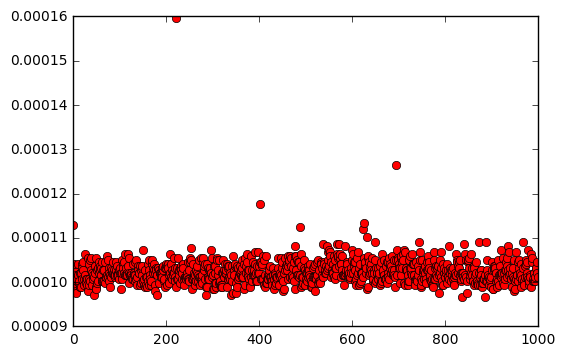

In [61]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(times, 'ro')
plt.show()

Accessing an element in a list by index always takes the same amount of time, regardless of position. I.e., indexing incurs a *constant time* delay.

How? **A Python list uses an array as its underlying data storage mechanism.** To access an element in an array, the interpreter:

1. Computes an *offset* into the array by multiplying the element's index by the size of each array entry (which are uniformly sized, since they are merely *references* to the actual elements)
2. Adds the offset to the *base address* of the array

## 3. Linear Search

Task: to locate an element with a given value in a list (array).

In [62]:
def index(lst, x):
    for i in range(len(lst)):
        if x == lst[i]:
            return i
    return None

In [64]:
lst = list(range(100))
index(lst, 10)

10

In [65]:
index(lst, 99)

99

In [68]:
index(lst, -1)

ValueError: -1

In [67]:
def index(lst, x):
    for i in range(len(lst)):
        if x == lst[i]:
            return i
    raise ValueError(x)

In [69]:
index(lst, 10)

10

In [70]:
index(lst, -1)

ValueError: -1

In [71]:
try:
    print('Value found at', index(lst, -1))
except ValueError as e:
    print('Value not found:', e)

Value not found: -1


In [72]:
import timeit
times = []
lst = list(range(1000))
for x in lst:
    times.append(timeit.timeit(stmt='index(lst, {})'.format(x),
                               globals=globals(),
                               number=100))

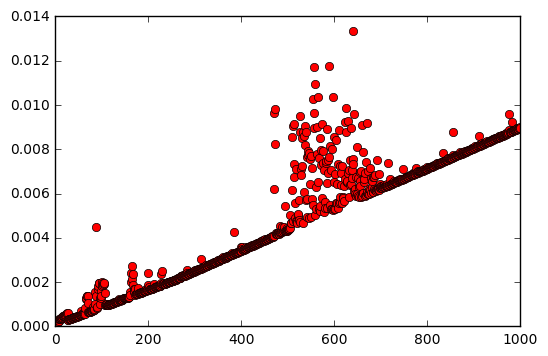

In [73]:
import matplotlib.pyplot as plt
plt.plot(times, 'ro')
plt.show()

## 4. Binary search

Task: to locate an element with a given value in a list (array) whose contents are *sorted in ascending order*.

In [77]:
def index(lst, x):
    # assume that lst is sorted!!!
    low = 0
    hi = len(lst)
    while low <= hi:
        mid = (low + hi) // 2
        if lst[mid] < x:#look in right half
            low = mid + 1
        elif lst[mid] > x:#Look in left half
            hi = mid -1
        else:
            return mid
            
    return None

In [78]:
lst = list(range(1000))
index(lst, 10)

10

In [79]:
index(lst, 999)

999

In [80]:
index(lst, -1)

In [81]:
for i in range(len(lst)):
    assert(i == index(lst, i))

In [82]:
import timeit
times = []
lst = list(range(1000))
for x in lst:
    times.append(timeit.timeit(stmt='index(lst, {})'.format(x),
                               globals=globals(),
                               number=1000))

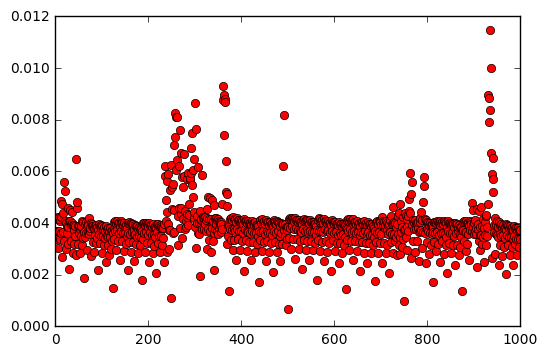

In [83]:
import matplotlib.pyplot as plt
plt.plot(times, 'ro')
plt.show()

In [84]:
import timeit
import random
times = []
for size in range(100, 10000, 100):
    lst = list(range(size))
    times.append(timeit.timeit(stmt='index(lst, -1)'.format(random.randrange(size)),
                               globals=globals(),
                               number=10000))

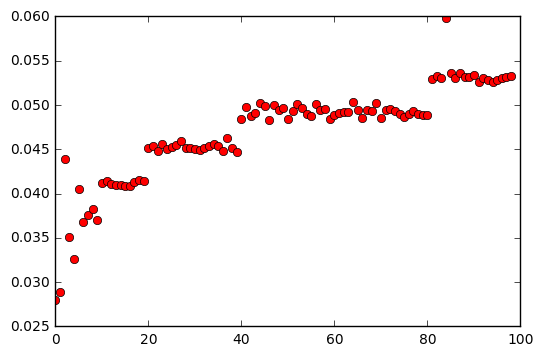

In [85]:
import matplotlib.pyplot as plt
plt.plot(times, 'ro')
plt.show()

In [86]:
import timeit
import random
times = []
for e in range(5, 20):
    lst = list(range(2**e))
    times.append(timeit.timeit(stmt='index(lst, -1)',
                               globals=globals(),
                               number=100000))

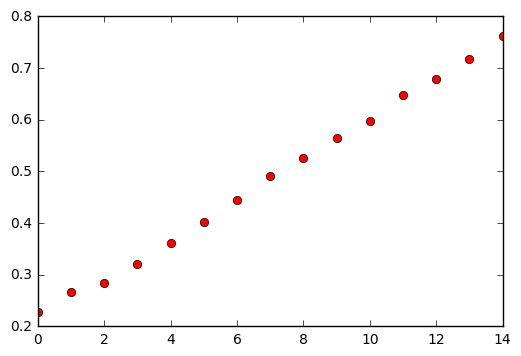

In [87]:
import matplotlib.pyplot as plt
plt.plot(times, 'ro')
plt.show()

## 5. Insertion sort

Task: to sort the values in a given list (array) in ascending order.

In [ ]:
import random
lst = list(range(1000))
random.shuffle(lst)

In [ ]:
plt.plot(lst, 'ro')
plt.show()

In [ ]:
def insertion_sort(lst):
    pass

In [ ]:
insertion_sort(lst)

In [ ]:
plt.plot(lst, 'ro')
plt.show()

In [ ]:
import timeit
import random
times = []
for size in range(100, 5000, 100):
    lst = list(range(size))
    times.append(timeit.timeit(stmt='insertion_sort(lst)',
                               setup='random.shuffle(lst)',
                               globals=globals(),
                               number=1))

In [ ]:
plt.plot(times, 'ro')
plt.show()